In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'http://strainapi.evanbusse.com/80Bxz5h/strains/search/all'
response = requests.get(url)
data = response.json()

In [3]:
# Creating Effects & Types DataFrame

names=list(data.keys())
positive,negative,medical,posi,neg,med,eff,tye=[],[],[],[],[],[],[],[]
for n in names:
    tye.append(data[n]['race'])
    eff.append(data[n]['effects']['positive']+data[n]['effects']['negative']+data[n]['effects']['medical'])
    positive.append(data[n]['effects']['positive'])
    posi.append(len(data[n]['effects']['positive']))
    negative.append(data[n]['effects']['negative'])
    neg.append(len(data[n]['effects']['negative']))
    medical.append(data[n]['effects']['medical'])
    med.append(len(data[n]['effects']['medical']))
dic={'name':names,'type':tye,'effects':eff}
df=pd.DataFrame(dic)

df.head()

,name,type,effects
0,Afpak,hybrid,"[Relaxed, Hungry, Happy, Sleepy, Dizzy, Depres..."
1,African,sativa,"[Euphoric, Happy, Creative, Energetic, Talkati..."
2,Afternoon Delight,hybrid,"[Relaxed, Hungry, Euphoric, Uplifted, Tingly, ..."
3,Afwreck,hybrid,"[Relaxed, Happy, Creative, Uplifted, Sleepy, D..."
4,Agent Orange,hybrid,"[Relaxed, Euphoric, Happy, Energetic, Uplifted..."


In [4]:
# Cleaning up df, creating dummy columns for all effects

effects=[]
pos=list(eff)
for p in pos:
    for i in p:
        if i not in effects:
            effects.append(i)
for i in effects:
    title=str(i)
    title=[]
    for x in df.effects:
        if i in x:
            title.append(1)
        else:
            title.append(0)
    df[i]=title
    
# Get dummies for type (indica=0,sativa=1,hybrid=2)
# Engineer features for positive effect score, negative effect score, and medical effect score

df.drop(columns='effects',inplace=True)
df.type=df.type.map({'indica':0,'sativa':1,'hybrid':2})
lowers=[]
for n in df['name']:
    lowers.append(n.lower())
df['name']=lowers
df['positive']=posi
df['negative']=neg
df['medical']=med

df.head()

,name,type,Relaxed,Hungry,Happy,Sleepy,Dizzy,Depression,Insomnia,Pain,...,Eye Pressure,Anxious,Giggly,Aroused,Inflammation,Spasticity,Seizures,positive,negative,medical
0,afpak,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,4,1,5
1,african,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,5,1,6
2,afternoon delight,2,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,5,3,6
3,afwreck,2,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,5,4,6
4,agent orange,2,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,5,4,6


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
pip install matplotlib-venn

     |████████████████████████████████| 40kB 1.4MB/s eta 0:00:011
  Stored in directory: /Users/stephaniekendall/Library/Caches/pip/wheels/d8/88/2f/e41518cb16e58109e8d14dc5dd7ef8166c82dce86c7c6d6c80
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


In [11]:
from matplotlib_venn import venn2

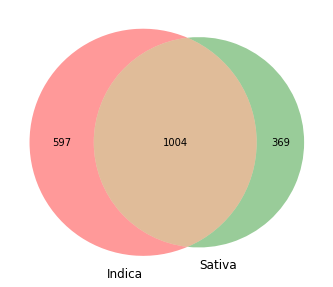

In [12]:
plt.figure(figsize=(10,5))
venn2(subsets=(len(df[df['type']==0]), len(df[df['type']==1]), len(df[df['type']==2])), set_labels=('Indica','Sativa','Hybrid'))

In [16]:
# descriptors of cannabis strains
can = pd.read_csv('/Users/stephaniekendall/Desktop/Flatiron/projects/Cannabis-Predictions/CSV Files/cannabis.csv', error_bad_lines=False)

# kushy csv
strains = pd.read_csv('/Users/stephaniekendall/Desktop/Flatiron/projects/Cannabis-Predictions/CSV Files/strains-kushy_api.2017-11-14.csv')

can['strain'] = can['strain'].str.replace('-',' ')

# drop columns with only zeros or NaN
strains = strains.drop(columns=['slug','image','thca','thcv','cbda','cbdv'])

# drop columns with over 80% NaNs
strains = strains.drop(columns=['description','crosses','ailment','flavor','location','terpenes','breeder'])

# drop last 7 columns of empty cbd values
strains = strains.iloc[:, 0:8]

# replace - with whitespace in name 
strains['name'] = strains['name'].str.replace('-',' ')

# create new dataframe for effects of strains
strains = strains.dropna()
effects = strains[['id','name','type','effects']]
strains = strains.drop(columns=['effects'])
                       
# make strain names & type lowercase for merging
effects['name'] = effects['name'].str.lower()
effects['type'] = effects['type'].str.lower()
                       
df1 = pd.merge(df, effects, left_on='name', right_on='name')

b'Skipping line 1333: expected 6 fields, saw 10\nSkipping line 1655: expected 6 fields, saw 10\nSkipping line 1656: expected 6 fields, saw 10\nSkipping line 1657: expected 6 fields, saw 10\nSkipping line 2102: expected 6 fields, saw 10\n'


In [25]:
strains['name'] = strains['name'].str.lower()
df2 = pd.merge(df1, strains, how='inner')
df2.head()

,name,type_x,Relaxed,Hungry,Happy,Sleepy,Dizzy,Depression,Insomnia,Pain,Stress,Lack of Appetite,Euphoric,Creative,Energetic,Talkative,Dry Mouth,Nausea,Headache,Uplifted,Tingly,Paranoid,Cramps,Dry Eyes,Fatigue,Headaches,Muscle Spasms,Focused,Eye Pressure,Anxious,Giggly,Aroused,Inflammation,Spasticity,Seizures,positive,negative,medical,id,type_y,effects,status,sort,type,thc,cbd
0,african,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,6,1419,sativa,"Happy, Creative, Euphoric, Energetic, Hungry, ...",2,0,Sativa,0,0
1,alaska,1,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,5,4,5,1421,hybrid,"Relaxed, Uplifted, Euphoric, Happy, Energetic,...",2,0,Hybrid,0,0
2,alaskan ice,1,0,0,1,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,5,4,5,1422,hybrid,"Euphoric, Happy, Relaxed, Uplifted, Hungry, Dr...",2,0,Hybrid,0,0
3,alaskan thunder fuck,1,1,0,1,0,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,5,4,6,18,sativa,"Happy, Euphoric, Uplifted, Energetic, Relaxed,...",1,0,Sativa,1500,0
4,alice in wonderland,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,5,4,5,1423,hybrid,"Relaxed, Happy, Uplifted, Focused, Creative, D...",2,0,Hybrid,0,0


In [19]:
pd.set_option('display.max_columns', 500)
df1.head()

,name,type_x,Relaxed,Hungry,Happy,Sleepy,Dizzy,Depression,Insomnia,Pain,Stress,Lack of Appetite,Euphoric,Creative,Energetic,Talkative,Dry Mouth,Nausea,Headache,Uplifted,Tingly,Paranoid,Cramps,Dry Eyes,Fatigue,Headaches,Muscle Spasms,Focused,Eye Pressure,Anxious,Giggly,Aroused,Inflammation,Spasticity,Seizures,positive,negative,medical,id,type_y,effects
0,african,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,6,1419,sativa,"Happy, Creative, Euphoric, Energetic, Hungry, ..."
1,alaska,1,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,5,4,5,1421,hybrid,"Relaxed, Uplifted, Euphoric, Happy, Energetic,..."
2,alaskan ice,1,0,0,1,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,5,4,5,1422,hybrid,"Euphoric, Happy, Relaxed, Uplifted, Hungry, Dr..."
3,alaskan thunder fuck,1,1,0,1,0,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,5,4,6,18,sativa,"Happy, Euphoric, Uplifted, Energetic, Relaxed,..."
4,alice in wonderland,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,5,4,5,1423,hybrid,"Relaxed, Happy, Uplifted, Focused, Creative, D..."


In [26]:
len(df2)

863

In [30]:
df2.describe()

,type_x,Relaxed,Hungry,Happy,Sleepy,Dizzy,Depression,Insomnia,Pain,Stress,Lack of Appetite,Euphoric,Creative,Energetic,Talkative,Dry Mouth,Nausea,Headache,Uplifted,Tingly,Paranoid,Cramps,Dry Eyes,Fatigue,Headaches,Muscle Spasms,Focused,Eye Pressure,Anxious,Giggly,Aroused,Inflammation,Spasticity,Seizures,positive,negative,medical,id,status,sort,thc,cbd
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.0,863.000000,863.000000
mean,0.378911,0.765933,0.253766,0.840093,0.413673,0.460023,0.769409,0.515643,0.790267,0.866744,0.365006,0.701043,0.320973,0.279258,0.091541,0.757822,0.206257,0.302433,0.514484,0.088065,0.395133,0.081112,0.634994,0.330243,0.295481,0.195829,0.232908,0.09270,0.287370,0.120510,0.082271,0.192352,0.023175,0.006952,4.704519,2.535342,5.033604,1384.293163,1.739282,0.0,136.003476,1.494786
std,0.487781,0.423660,0.435418,0.366733,0.492777,0.498688,0.421455,0.500045,0.407354,0.340048,0.481711,0.458066,0.467121,0.448895,0.288544,0.428650,0.404852,0.459578,0.500080,0.283554,0.489163,0.273166,0.481711,0.470573,0.456523,0.397067,0.422930,0.29018,0.452798,0.325746,0.274937,0.394377,0.150546,0.083139,0.645934,1.670222,1.083533,683.956016,0.439281,0.0,430.101398,34.221669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,1.000000,0.0,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000,745.500000,1.000000,0.0,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,5.000000,1643.000000,2.000000,0.0,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,6.000000,1904.500000,2.000000,0.0,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,6.000000,2178.000000,2.000000,0.0,2200.000000,1000.000000


<Figure size 720x360 with 0 Axes>

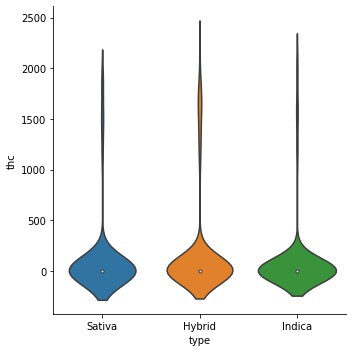

In [39]:
plt.figure(figsize=(10,5))
sns.catplot(x='type',y='thc',kind='violin',data=df2)

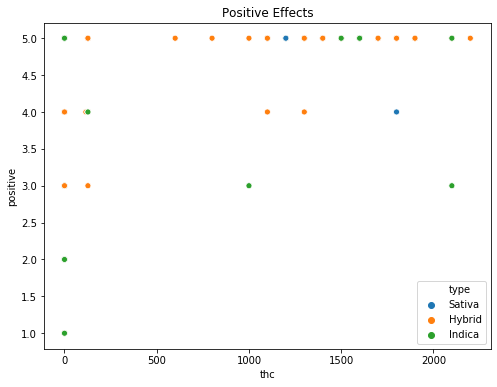

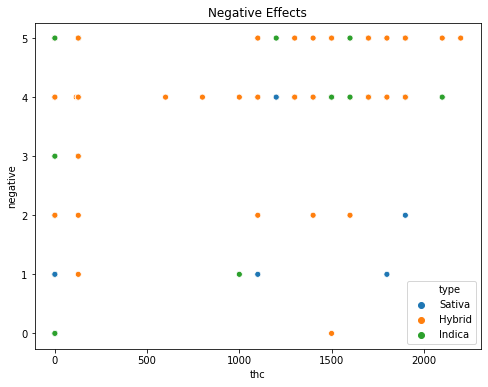

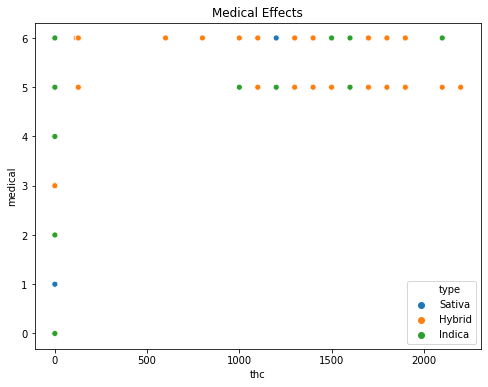

In [29]:
plt.figure(figsize=(8,6))
plt.title('Positive Effects')
sns.scatterplot(x='thc',y='positive',hue='type',data=df2)

plt.figure(figsize=(8,6))
plt.title('Negative Effects')
sns.scatterplot(x='thc',y='negative',hue='type',data=df2)

plt.figure(figsize=(8,6))
plt.title('Medical Effects')
sns.scatterplot(x='thc',y='medical',hue='type',data=df2)

Probability of Indica: 0.6222479721900348
Probability of Sativa: 0.3765932792584009
Probability of Hybrid: 0.0011587485515643105


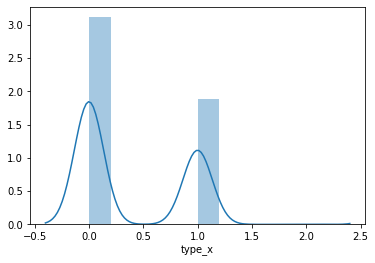

In [36]:
indicadf=df2[df2['type_x']==0]
sativadf=df2[df2['type_x']==1]
hybriddf=df2[df2['type_x']==2]

sns.distplot(df2['type_x'])
prind= len(indicadf)/len(df2)
prsat= len(sativadf)/len(df2)
prhyb= len(hybriddf)/len(df2)
print('Probability of Indica: {}'.format(prind))
print('Probability of Sativa: {}'.format(prsat))
print('Probability of Hybrid: {}'.format(prhyb))


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures 

ValueError: Neither the `x` nor `y` variable appears to be numeric.

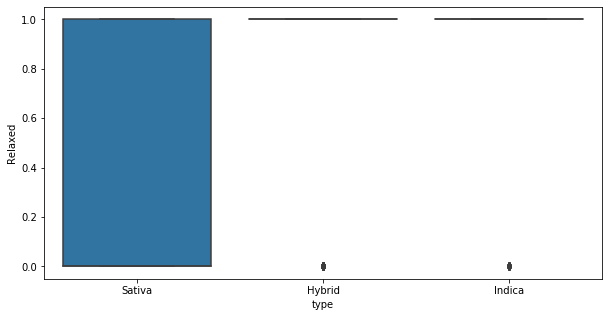

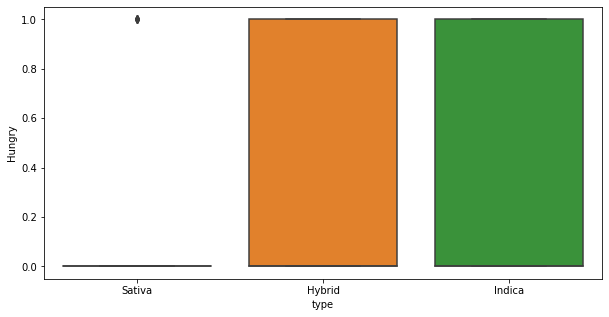

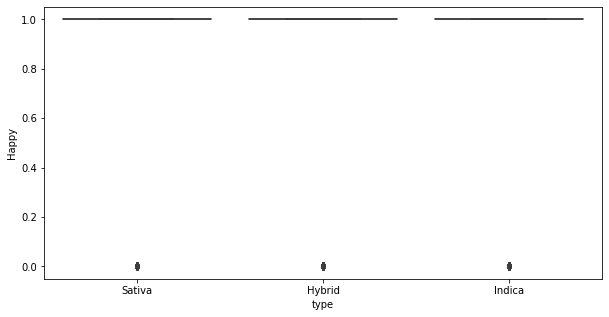

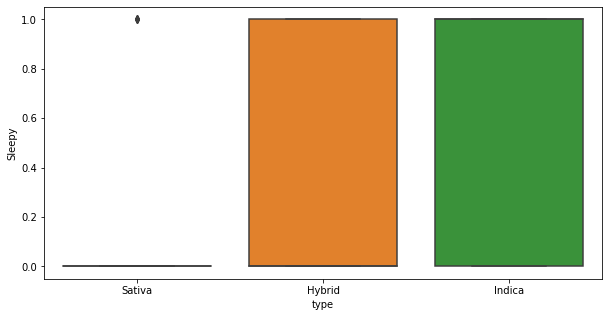

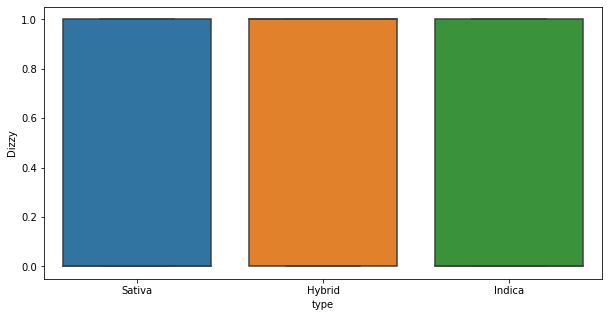

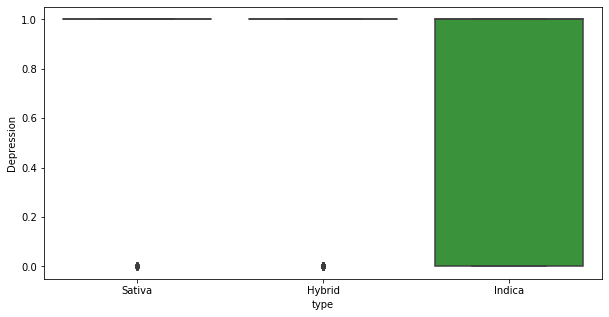

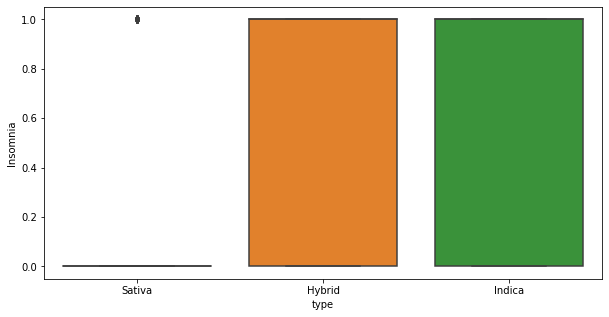

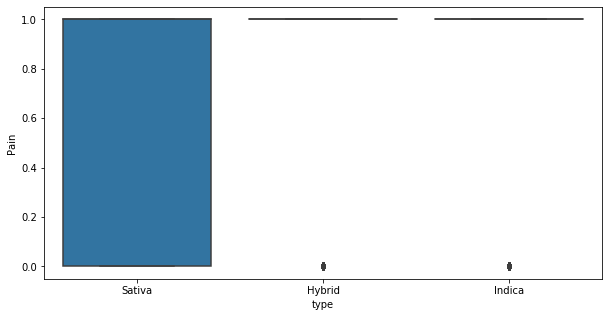

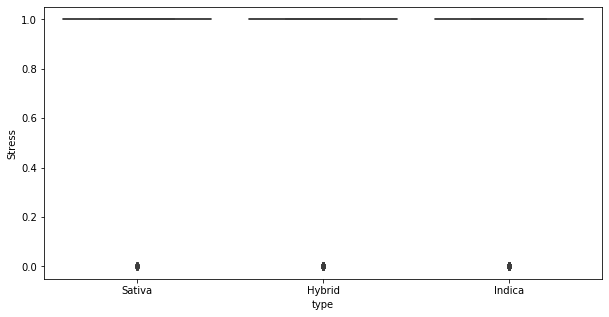

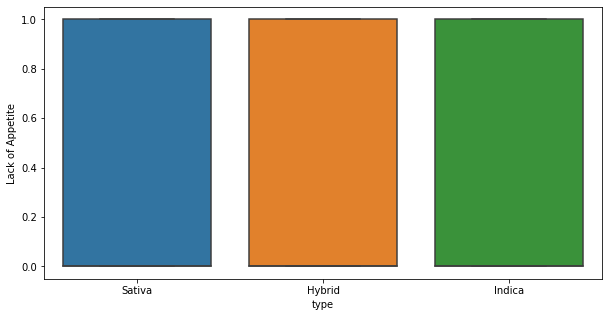

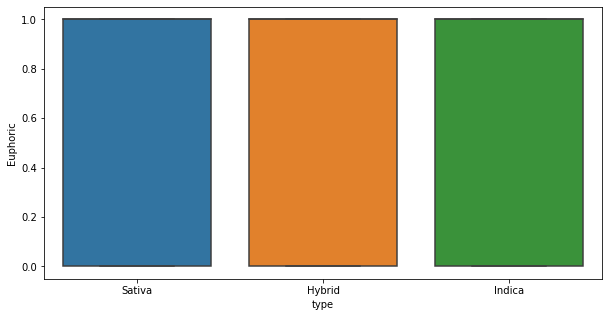

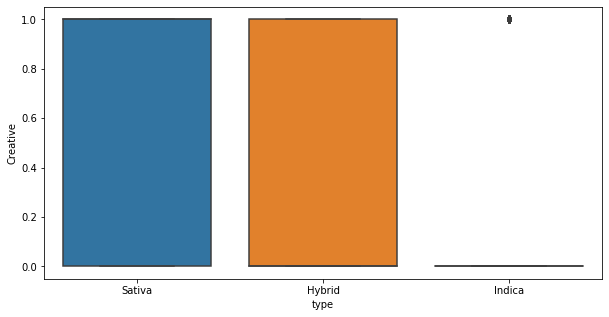

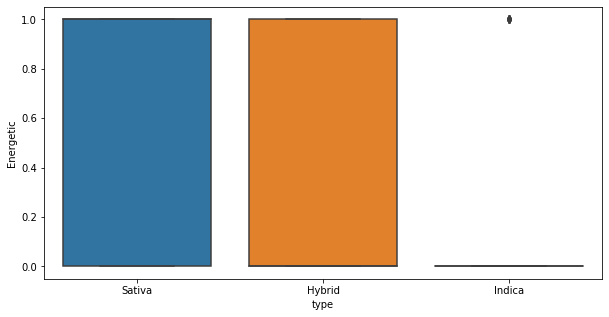

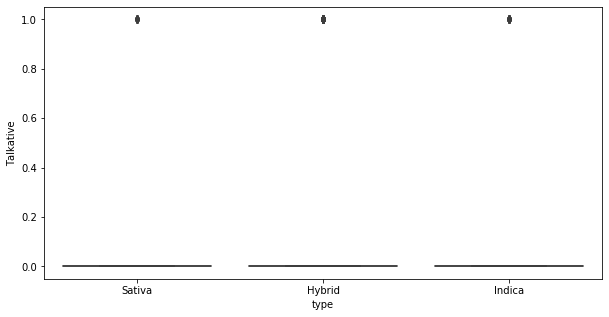

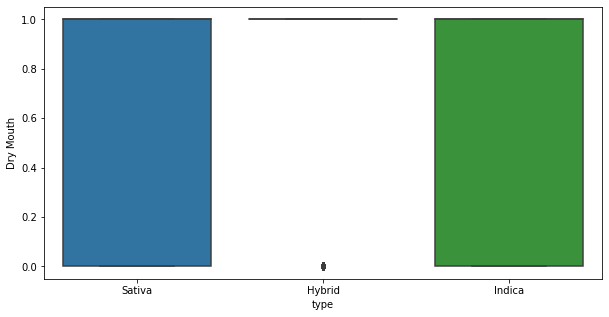

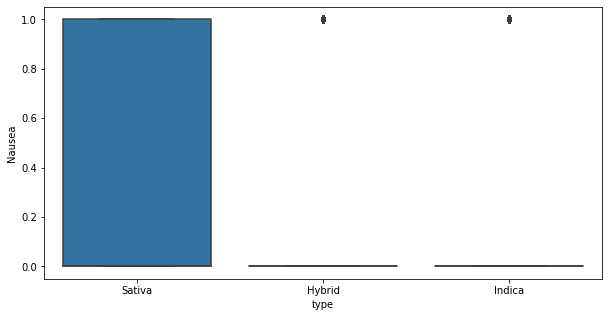

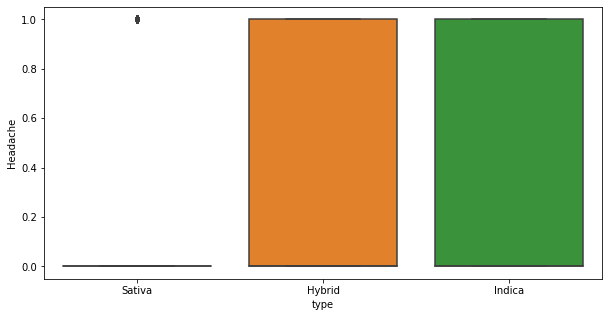

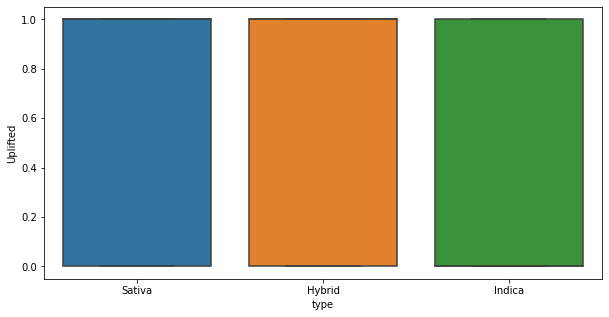

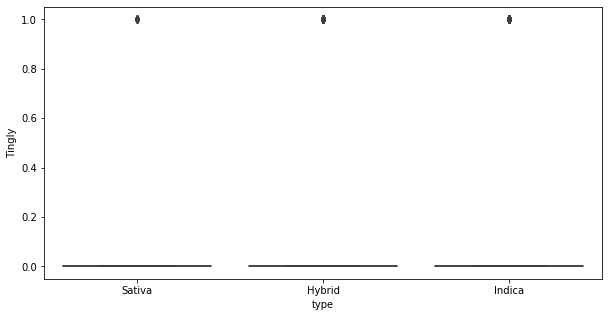

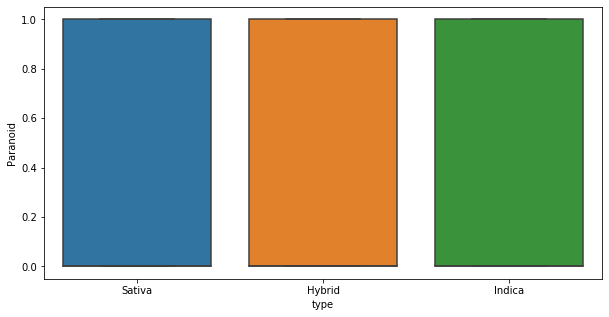

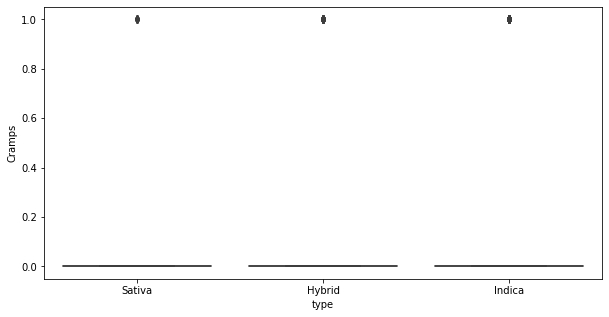

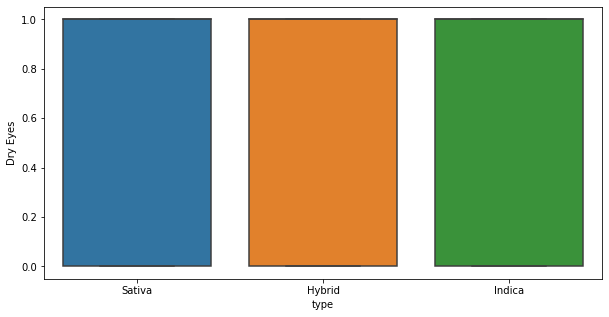

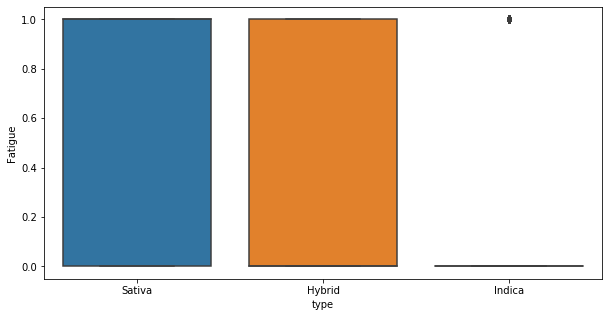

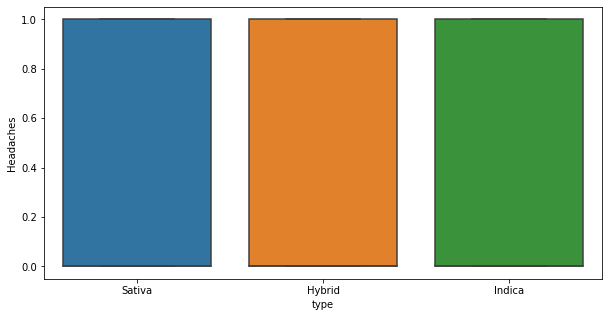

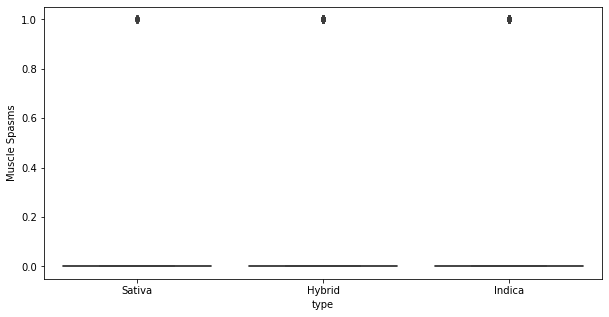

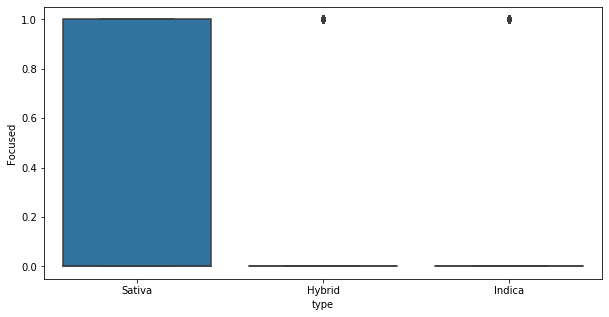

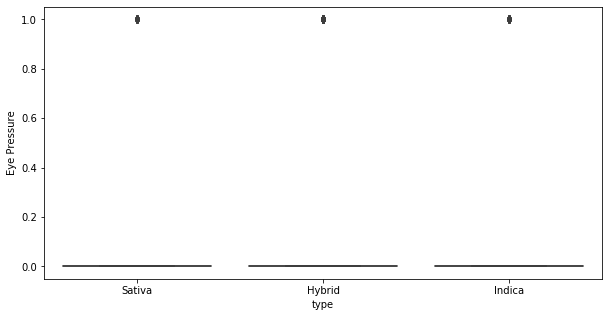

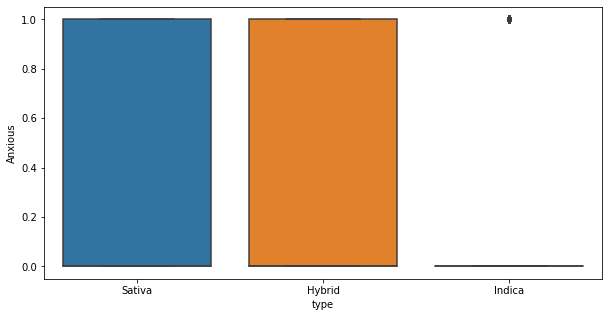

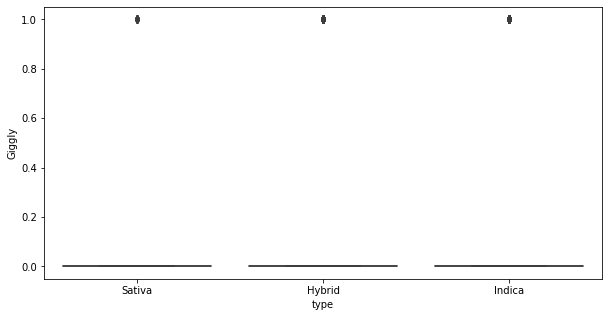

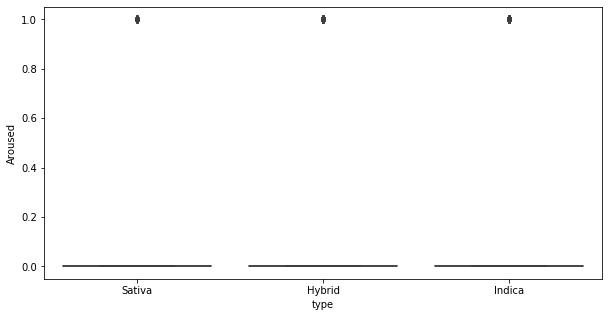

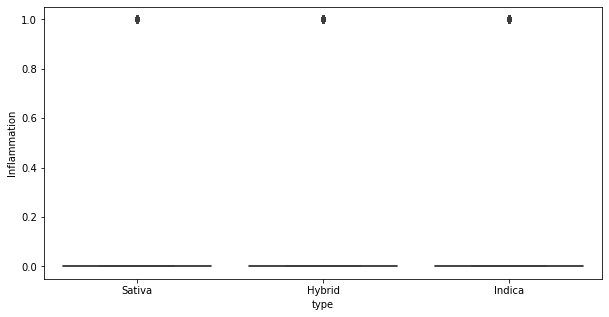

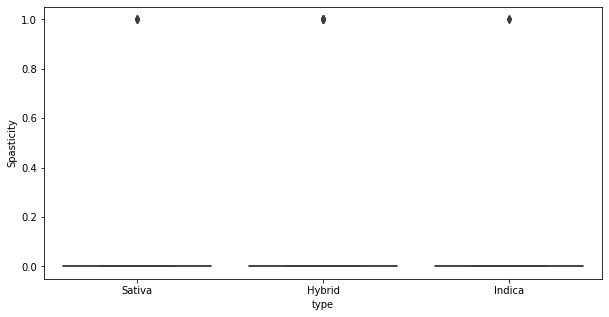

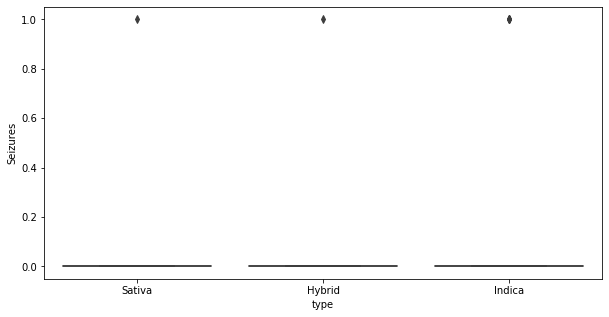

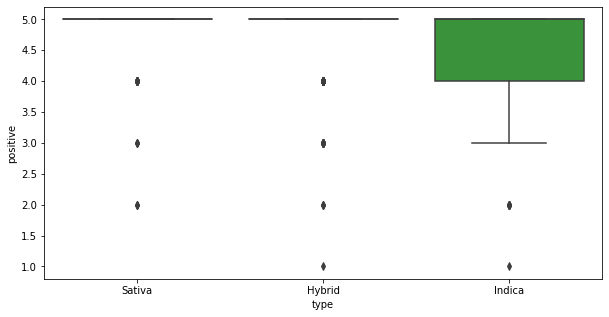

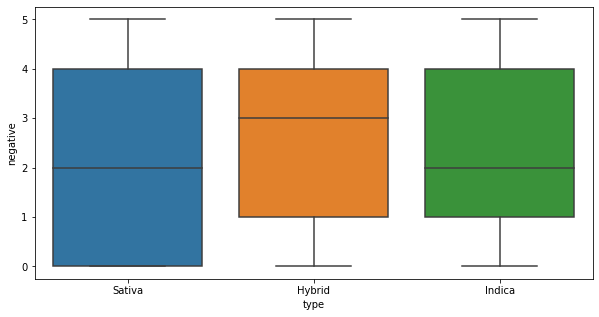

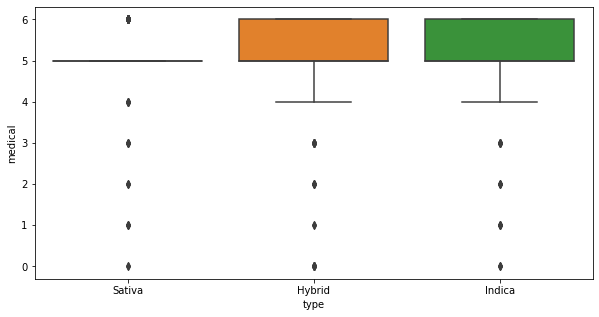

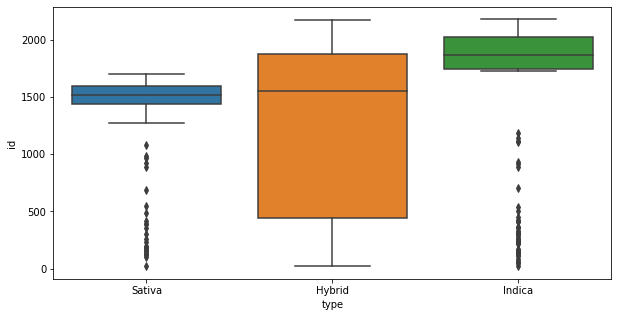

<Figure size 720x360 with 0 Axes>

In [42]:
effects=df2.columns[2:]
for e in effects:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='type',y=e,data=df2)



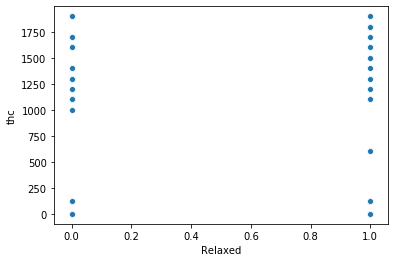

In [45]:
sns.scatterplot(sativadf['Relaxed'],sativadf['thc'])
# sns.scatterplot(hybriddf['Relaxed'])

In [5]:
# Webscrape THC & CBD contents from Potbotics

namelist, typelist, thclist, cbdlist, cbnlist, cbclist, thcvlist, cbglist = [],[],[],[],[],[],[],[]

responses = requests.get('https://www.potbotics.com/learn/strains')
soup = BeautifulSoup(responses.content,'html.parser')
names = soup.findAll('h4',{'class':'card-title'})
types = soup.findAll('h5',{'class':'type'})
thc = soup.findAll('p',{'class':'amount thc'})
cbd = soup.findAll('p',{'class':'amount cbd'})
cbn = soup.findAll('p',{'class':'amount cbn'})
cbc = soup.findAll('p',{'class':'amount cbc'})
thcv = soup.findAll('p',{'class':'amount thcv'})
cbg = soup.findAll('p',{'class':'amount cbg'})

for n, t, t2, c, c2, c3, t3, c4 in zip(names, types, thc, cbd, cbn, cbc, thcv, cbg):
    namelist.append(n.text)
    typelist.append(t.text)
    thclist.append(t2.text)
    cbdlist.append(c.text)
    cbnlist.append(c2.text)
    cbclist.append(c3.text)
    thcvlist.append(t3.text)
    cbglist.append(c4.text)

data_nums = {'name':namelist, 'type':typelist, 'thc':thclist, 'cbd':cbdlist, 'cbn':cbnlist, 'cbc':cbclist, 'thcv':thcvlist, 'cbg':cbglist}
contents = pd.DataFrame(data_nums)

# Get dummies for type
df.drop(columns='effects',inplace=True)
df.type=df.type.map({'indica':0,'sativa':1,'hybrid':2})
lowers=[]
for n in df['name']:
    lowers.append(n.lower())
df['name']=lowers
df['positive']=posi
df['negative']=neg
df['medical']=med

df.head()
contents.head()

KeyError: "['effects'] not found in axis"

In [26]:
contents.sample(20)

,name,type,thc,cbd,cbn,cbc,thcv,cbg
13,Banana Haze,SATIVA_DOMINANT,20.37,0.656,0.015,0.067,0,0.175
64,Gelato,HYBRID,10.99,0.178,0.075,0.268,0,0.019
182,William's Wonder,INDICA_DOMINANT,19.86,0.113,0.177,0.101,0.009,0.801
103,Liberty Haze,HYBRID,19.39,0,0.072,0.084,0.004,0.233
89,Juicy J,SATIVA_DOMINANT,12.68,0,0.012,0.053,0,0.103
131,Platinum Purple Kush,INDICA,17.88,0.005,0.021,0.235,0,0.075
137,Purple Gorilla,INDICA_DOMINANT,10.12,0,0.005,0.19,0.005,0
25,Blue Ice,HYBRID,16.48,0.176,0.02,0.289,0,0.125
140,Purple Urkle,INDICA,10.56,0,0.261,0.027,0.003,0.083
155,Strawberry Banana,SATIVA_DOMINANT,16.67,0,0.065,0.054,0,0


In [27]:
from matplotlib import pyplot as plt
import matplotlib_venn as venn
plt.figure(figsize=(10,5))
venn2(subsets=(len(num_df[num_df['type']==0]),len(num_df[num_df['type']==1]),len(num_df[num_df['type']==2])),set_labels=('Indica','Sativa'))
plt.savefig('Visualizations/VennDiagram_Indica_Sativa.png')

ModuleNotFoundError: No module named 'matplotlib_venn'